### Q1 :
Construct a second-order forward difference scheme.

Choosing $x_{i+2} - x_{i+1} = x_{i+1} - x_{i} = \Delta x = h $,  
By Taylor Expansions, we get,  
$$f_{i+2}-f_{i}=2\Delta x f_{i}^{'} + \frac{(2\Delta x)^2}{2!}f_{i}^{''2} + E_1((\Delta x)^3)......(1)$$
$$f_{i+1}-f_{i}=\Delta x f_{i}^{'} + \frac{(\Delta x)^2}{2!}f_{i}^{''2} + E_2((\Delta x)^3)......(2)$$
where, $E_1((\Delta x)^3)$ and $E_2((\Delta x)^3)$ are error terms of order $(\Delta x)^3$, which we ignore.  
Multiply Eq.(2) by $-4$ and add it to Eq.(1) to get,  
$$f_{i}^{'} = \frac{-3f_{i} + 4f_{i+1} - f_{i+2}}{2\Delta x}$$

In [35]:
#second order forward difference scheme for first order differentiation
#x is the primary variable, f is a function of x
def derivative(x,f):
    h=0.00000001
    return ( -3*f(x) + 4*f(x+h) - f(x+(2*h)) )/(2*h)

### Q2 :
Use forward- and central-difference algorithms to differentiate the functions $\cos{(𝑡)}$ and $e^t$ at $t = 0.1, 1.,$ and $100.$ Plot the derivative and its relative error as functions of $h$. Explain what happens when you reduce h too much?

-0.09983343041142234
-0.8414709928850073
0.5063653274461899
-0.0998334193091921
-0.8414709873338921
0.5063653274461899
1.1051709103426788
2.7182818218562943
2.688115440444339e+43
1.1051709103426788
2.7182818218562943
2.688115440444339e+43


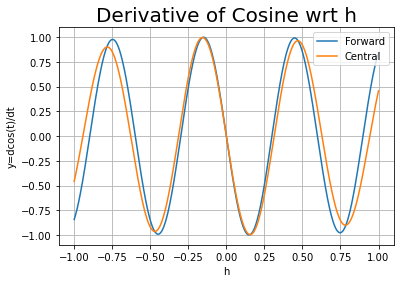

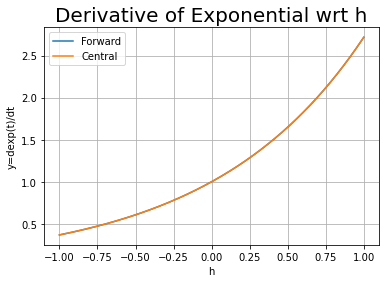

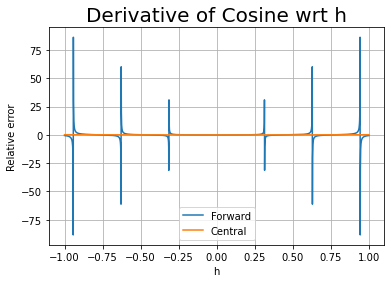

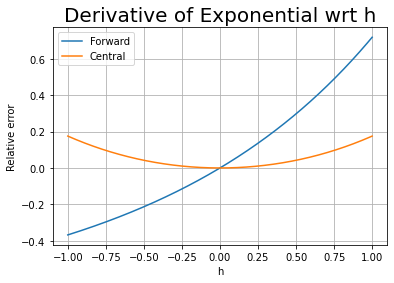

In [36]:
import matplotlib.pyplot as plt
import numpy as np
def forward(h,t,f):#forward diff algo
    #h=0.00000001
    return (f(t+h)-f(t))/h
def central(h,t,f):#central diff algo
    #h=0.00000001
    return (f(t+h)-f(t-h))/(2*h)
#derivative of cos() with forward derivative
print(forward(0.00000001,0.1,np.cos))#at t=0.1
print(forward(0.00000001,1,np.cos))#at t=1
print(forward(0.00000001,100,np.cos))#at t=100
#derivative of cos() with central derivative
print(central(0.00000001,0.1,np.cos))#at t=0.1
print(central(0.00000001,1,np.cos))#at t=1
print(central(0.00000001,100,np.cos))#at t=100
#derivative of exp() with forward derivative
print(forward(0.00000001,0.1,np.exp))#at t=0.1
print(forward(0.00000001,1,np.exp))#at t=1
print(forward(0.00000001,100,np.exp))#at t=100
#derivative of exp() with central derivative
print(central(0.00000001,0.1,np.exp))#at t=0.1
print(central(0.00000001,1,np.exp))#at t=1
print(central(0.00000001,100,np.exp))#at t=100

h = np.linspace(-1,1,2000)
#plot for cos()
plt.plot(h,forward(h,t,np.cos),label='Forward')
plt.plot(h,central(h,t,np.cos),label='Central')
plt.legend()
plt.xlabel('h',size=10)
plt.ylabel('y=dcos(t)/dt', size=10)
plt.title('Derivative of Cosine wrt h',size=20)
plt.grid()
plt.show()
#plot for exp()
plt.plot(h,derivative(h,np.exp),label='Forward')
plt.plot(h,derivative(h,np.exp),label='Central')
plt.legend()
plt.xlabel('h',size=10)
plt.ylabel('y=dexp(t)/dt', size=10)
plt.title('Derivative of Exponential wrt h',size=20)
plt.grid()
plt.show()
#plot for error term in derivative of cosine
plt.plot(h,(forward(h,t,np.cos)+np.sin(t))/np.sin(t),label='Forward')
plt.plot(h,(central(h,t,np.cos)+np.sin(t))/np.sin(t),label='Central')
plt.legend()
plt.xlabel('h',size=10)
plt.ylabel('Relative error', size=10)
plt.title('Derivative of Cosine wrt h',size=20)
plt.grid()
plt.show()
#plot for error term in dervative of exponential
plt.plot(h,(forward(h,t,np.exp)-np.exp(t))/np.exp(t),label='Forward')
plt.plot(h,(central(h,t,np.exp)-np.exp(t))/np.exp(t),label='Central')
plt.legend()
plt.xlabel('h',size=10)
plt.ylabel('Relative error', size=10)
plt.title('Derivative of Exponential wrt h',size=20)
plt.grid()
plt.show()

Obviously, as error h is reduced too much, it apporaches 0, that is relative error approaches 0.

### Q3 : 
Evaluate the integral of $e^{-x^2}$ and $\frac{sin(x)}{x}$ from $-\infty$ to $\infty$.

In [37]:
def simpson(a,b,N,f):
    x = np.linspace(a,b,N)
    h = (b-a)/N
    
    I = f(x[0])
    for i in range(1,N-1,2):
        I=I+(4*f(x[i])+2*f(x[i+1]))
    
    I=I+f(x[N-1])
    I = I*(h/3)
    return I

def gaussian(x):
    return np.exp(-x**2)

def sinc(x):
    return np.sin(x)/x

print("Integral of gaussian = ",simpson(-100000,100000,2000000,gaussian))
print("Integral of sinc = ",simpson(-100000,100000,2000000,sinc))

Integral of gaussian =  1.7724529646794072
Integral of sinc =  3.141611041417572


### Q4 : 
Find the exact solution of Q1 in `matplotlib.ipynb` file, using the root solving methods discussed here, and the initial guess which you got in that question.

The value of $x$ as a function of $\theta$ was coming out to be,  
$$x=10 \cos{\theta}\left(\sin{\theta + \sqrt{\sin^2{\theta}+1}}\right)$$

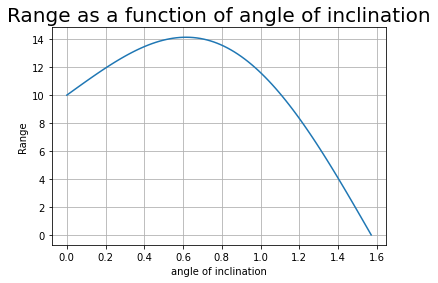

In [43]:
def x(th):
    return 10*np.cos(th)*( np.sin(th) + np.sqrt(np.sin(th)**2 + 1) )
theta = np.linspace(0,np.pi/2,90)
y = x(theta)
plt.plot(theta,y)
plt.xlabel('angle of inclination',size=10)
plt.ylabel('Range', size=10)
plt.title('Range as a function of angle of inclination',size=20)
plt.grid()
plt.show()

This was giving angle of inclination $\theta \approx 0.1^c$ for $x=11.5m$.  
Now we find root using Newton Raphson method.

In [55]:
def g(th):
    return x(th) - 11.5

def gPrime(th):
    return central(0.00000001,th,g)

n=0
error=0.0000001
th = 0.1

while((abs(g(th))>error) and (n<100)):
    th1=th-(g(th))/gPrime(th)
    th=th1
    n=n+1

print(n)
print(th,g(th))

3
0.1526264280876081 -1.7763568394002505e-13


Root Finding using the Secant method

In [57]:
#initial parameters
a=0
b=0.2
n=0
#secant method algorithm
th=b+g(b)*(b-a)/(g(b)-g(a))
while(abs(g(th))>error and n<100):
    a=b
    b=th
    th=b-g(b)*(b-a)/(g(b)-g(a))
    n=n+1
   

print(n)
print(th,g(th))

4
0.15262642808264282 -4.7190695795507054e-11


### Q5 : 
The voltage difference $V_0$ across a diode is related to current $I$ passing through it by $I=I_s.(e^\frac{V_0}{nV_T}-1)$. Find the value of $V_0$ for the following circuit. Take $I_s=2*10^{-15}A, V_T=26mV, n=1, V_s=2V, R=1k \Omega$

Here objective function is,  
$$f(x) = a - b(e^{(x/c)}-1) - x$$,  
where, $a=2$, $b=2\cdot10^{-12}$, $c=26\cdot10^{-3}$ and $x$ represents $V_0$

54
0.7070645448577505 -1.3855183366162649e-06


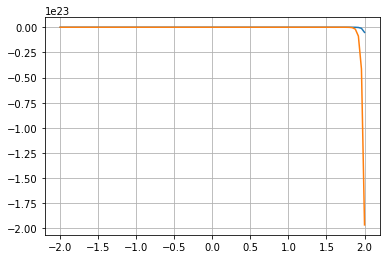

In [63]:
aVal=2
bVal=2e-12
cVal=2.6e-2
def f(x):
    return aVal - bVal*(np.exp(x/cVal)-1) - x

def fPrime(x):
    return central(0.00000001,x,f)

xList=np.linspace(-2,2,100)
plt.grid()
plt.plot(xList,f(xList),label='f(x)')
plt.plot(xList,fPrime(xList),label="f\'(x)")

#setting the initial parameters
n1=0
error=0.0001
x=0

#Newton-Raphson method algorithm
while((abs(f(x))>error) and (n1<100)):
    x1=x-f(x)/fPrime(x)
    x=x1
    n1=n1+1

    
print(n1)
print(x,f(x))